Assignment 2:

Create a forecast for what the visits would look like for the next year based on the historic data points from the ‘Data for Forecast’ file (attached herewith). You should:

1. Consider seasonality and normalize the anomalies, if any
2. Choose any apt methodology/tool/technique to create and present the analysis (based on your current skillsets and abilities)
   For this assignment, we will be looking for creativity around "visual representation" of forecast, as well as details on the      methodology used.

In [1]:
# Importing Libraries
import pandas as pd
import warnings
warnings.simplefilter('ignore')
from prophet import Prophet
import matplotlib.pyplot as plt
import plotly
%matplotlib inline

In [77]:
# Reading the input file
df = pd.read_excel('Data for Forecast.xlsx')
df.head()

,ID,Date (week beginning),Selected Period
0,1,"Dec 26, 2011",1284608
1,2,"Jan 2, 2012",13059880
2,3,"Jan 9, 2012",14076974
3,4,"Jan 16, 2012",14337217
4,5,"Jan 23, 2012",14681748


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     119 non-null    int64 
 1   Date (week beginning)  119 non-null    object
 2   Selected Period        119 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB


In [79]:
# Splitting the Data column
df['Month'] = df['Date (week beginning)'].apply(lambda x:x.split(' ')[0])
df['Date'] = df['Date (week beginning)'].apply(lambda x:x.split(' ')[1])
df['Date'] = df['Date'].replace(',', '', regex=True)
df['Year'] = df['Date (week beginning)'].apply(lambda x:x.split(',')[1])
df.head(2)

,ID,Date (week beginning),Selected Period,Month,Date,Year
0,1,"Dec 26, 2011",1284608,Dec,26,2011
1,2,"Jan 2, 2012",13059880,Jan,2,2012


In [80]:
# Dropping the Actual Date column
df = df.drop(['Date (week beginning)'], axis=1)
df.head(2)

,ID,Selected Period,Month,Date,Year
0,1,1284608,Dec,26,2011
1,2,13059880,Jan,2,2012


In [81]:
# Creating a dictionary for mapping the months
S1 = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06',
      'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

In [69]:
# Mapping the dictionary
df['Month'] = df['Month'].map(S1)
df.head()

,ID,Selected Period,Month,Date,Year
0,1,1284608,12,26,2011
1,2,13059880,01,2,2012
2,3,14076974,01,9,2012
3,4,14337217,01,16,2012
4,5,14681748,01,23,2012


In [82]:
# converting the date in the required format
df['YMD']=df['Year']+'-'+df['Month']+'-'+df['Date']
df.head()

,ID,Selected Period,Month,Date,Year,YMD
0,1,1284608,Dec,26,2011,2011-Dec-26
1,2,13059880,Jan,2,2012,2012-Jan-2
2,3,14076974,Jan,9,2012,2012-Jan-9
3,4,14337217,Jan,16,2012,2012-Jan-16
4,5,14681748,Jan,23,2012,2012-Jan-23


In [83]:
#Dropping the unnecessary columns for modeling purpose
df.drop(['ID','Year','Month','Date'],axis=1,inplace=True)

In [84]:
df.head()

,Selected Period,YMD
0,1284608,2011-Dec-26
1,13059880,2012-Jan-2
2,14076974,2012-Jan-9
3,14337217,2012-Jan-16
4,14681748,2012-Jan-23


In [85]:
#Converting the YMD column into DatetimeIndex format
df['YMD']=pd.DatetimeIndex(df['YMD'])
df.head()

,Selected Period,YMD
0,1284608,2011-12-26
1,13059880,2012-01-02
2,14076974,2012-01-09
3,14337217,2012-01-16
4,14681748,2012-01-23


In [86]:
df.dtypes

Selected Period             int64
YMD                datetime64[ns]
dtype: object

In [93]:
#Set the YMD column as an index to see some trends in the data overtime
df = df.set_index('YMD', drop=True)

pandas.core.frame.DataFrame

In [94]:
df.head()

,Selected Period
YMD,
2011-12-26,1284608
2012-01-02,13059880
2012-01-09,14076974
2012-01-16,14337217
2012-01-23,14681748


<AxesSubplot:xlabel='YMD'>

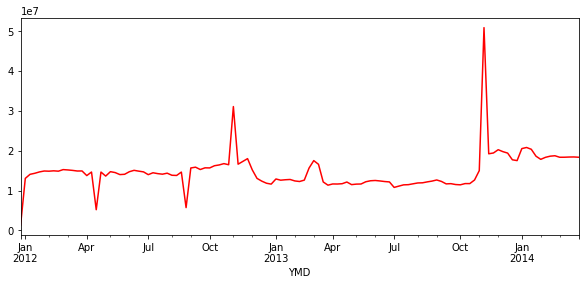

In [99]:
#Checking the trend of the data
df['Selected Period'].plot(xlim=['2011-12-26','2014-03-31'],figsize=(10,4), c='red')

By looking at the above figure we can observe that in 2013 between october to December month we can see some sudden growth and can be identified as an outlier/Anomalies present.

In [103]:
index = df.loc['2011-12-26':'2014-03-31'].index
Selected_Period = df.loc['2011-12-26':'2014-03-31']['Selected Period']

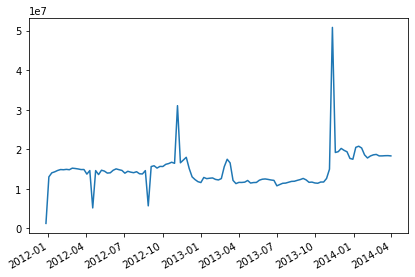

In [104]:
figure,axis=plt.subplots()
plt.tight_layout()

## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,Selected_Period)

# Time Resampling
#### Resampling is used in time series data. This is a convenience method for frequency conversion and resampling of time series data

In [105]:
#Checking which data in a year is minimum
df.resample(rule='A').min()

,Selected Period
YMD,
2011-12-31,1284608
2012-12-31,5201136
2013-12-31,10794839
2014-12-31,17834756


In [106]:
#Checking which data in a year is Maximum
df.resample(rule='A').max()

,Selected Period
YMD,
2011-12-31,1284608
2012-12-31,31075937
2013-12-31,50876875
2014-12-31,20812220


In [107]:
#Finding the mean data in the entire year
df.resample(rule='A').mean()

,Selected Period
YMD,
2011-12-31,1.284608e+06
2012-12-31,1.471989e+07
2013-12-31,1.402438e+07
2014-12-31,1.890840e+07


<AxesSubplot:xlabel='YMD'>

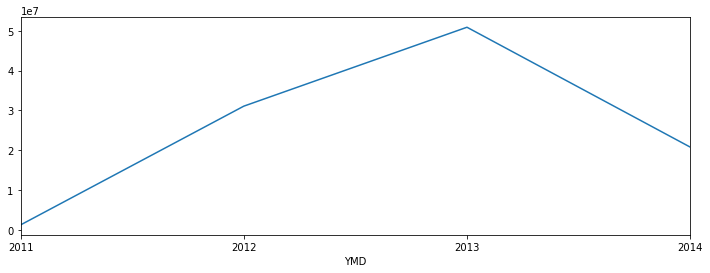

In [109]:
##year end frequency
df.resample(rule='A').max()['Selected Period'].plot(figsize=(12,4))

As we can the trend of the data how it is increasing from 2011 to 2013 and then there is sudden decrease after 2013.

<AxesSubplot:xlabel='YMD'>

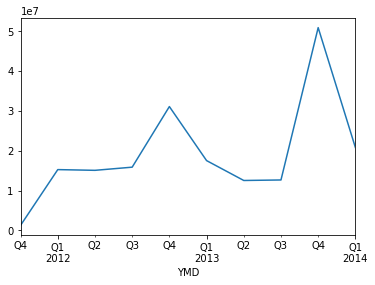

In [110]:
##quaterly start frequency
df.resample(rule='QS').max()['Selected Period'].plot()

With the help of rule QS we can see which particular quarter has seen sudden increase like in the above plot we can clearly say that in Q3 there is a sudden increase.

In [111]:
##Business End Frequency
df.resample(rule='BA').max()

,Selected Period
YMD,
2011-12-30,1284608
2012-12-31,31075937
2013-12-31,50876875
2014-12-31,20812220


"BA" rule signifies the business end frequencies like in share market what was the maximum price of the share for a particular company at the end of each year.

In [112]:
##Business End Frequency
df.resample(rule='BA').min()

,Selected Period
YMD,
2011-12-30,1284608
2012-12-31,5201136
2013-12-31,10794839
2014-12-31,17834756


"BA" rule signifies the business end frequencies like in share market what was the minimum price of the share for a particular company at the end of each year.

In [113]:
##Business End Frequency
df.resample(rule='BA').mean()

,Selected Period
YMD,
2011-12-30,1.284608e+06
2012-12-31,1.471989e+07
2013-12-31,1.402438e+07
2014-12-31,1.890840e+07


"BA" rule signifies the business end frequencies like in share market what was the mean price of the share for a particular company at the end of each year.

Like wise there are many rules which we can apply such as BQS, MS, WOM etc...

<AxesSubplot:xlabel='YMD'>

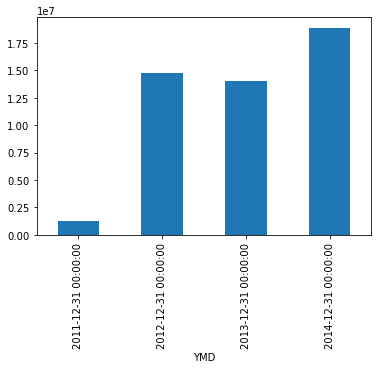

In [116]:
## We can also do Bar plotting and check the trend
df['Selected Period'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='YMD'>

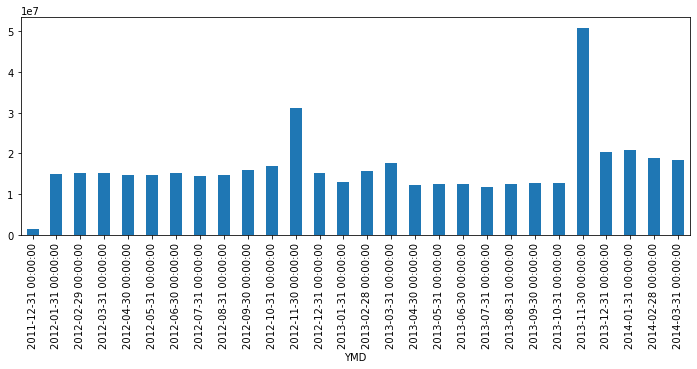

In [118]:
#MonthEnd Data
df['Selected Period'].resample(rule='M').max().plot(kind='bar',figsize=(12,4))

As in the above Bar plot we can clearly see that in November 2013 there is sudden increase in Data points which also leads to outliers or Anomalies.

## Rolling
Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which, of course, rolls through the data.

simple moving average can be used for smoothening the graph for a short term like 10, 30, 50 days such as in Stock Market and many more fields.

We can also use Cumulative Moving Average(CMA), Exponential weight moving agerage(EWMA) for smoothening the graph.

In [121]:
df['Selected Period:5 days rolling']=df['Selected Period'].rolling(5).mean()
df.head()

,Selected Period,Selected Period:5 days rolling
YMD,,
2011-12-26,1284608,NaN
2012-01-02,13059880,NaN
2012-01-09,14076974,NaN
2012-01-16,14337217,NaN
2012-01-23,14681748,11488085.4


<AxesSubplot:xlabel='YMD'>

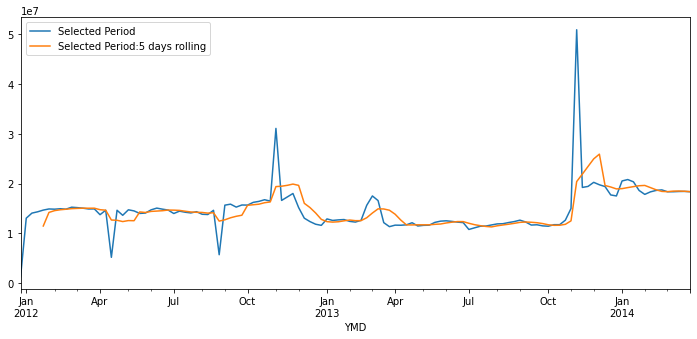

In [124]:
df[['Selected Period','Selected Period:5 days rolling']].plot(figsize=(12,5))

### TRAINING MODEL

In [127]:
df.drop('Selected Period:5 days rolling', axis=1, inplace=True)

In [133]:
df = df.reset_index()
df.head()

,YMD,Selected Period
0,2011-12-26,1284608
1,2012-01-02,13059880
2,2012-01-09,14076974
3,2012-01-16,14337217
4,2012-01-23,14681748


In [135]:
df.columns=['ds', 'y']
df.head()

,ds,y
0,2011-12-26,1284608
1,2012-01-02,13059880
2,2012-01-09,14076974
3,2012-01-16,14337217
4,2012-01-23,14681748


In [136]:
m=Prophet(interval_width=0.95,daily_seasonality=True)
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


### PREDICTION

In [142]:
future=m.make_future_dataframe(periods=90,freq='D')
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
204,2014-06-25,8.792584e+06,1.149817e+07,2.481729e+07,8.645172e+06,8.919232e+06,9.259170e+06,9.259170e+06,9.259170e+06,1.032840e+07,1.032840e+07,1.032840e+07,-1.069228e+06,-1.069228e+06,-1.069228e+06,0.0,0.0,0.0,1.805175e+07
205,2014-06-26,8.806370e+06,1.148984e+07,2.481975e+07,8.657104e+06,8.935198e+06,9.103814e+06,9.103814e+06,9.103814e+06,1.032840e+07,1.032840e+07,1.032840e+07,-1.224584e+06,-1.224584e+06,-1.224584e+06,0.0,0.0,0.0,1.791018e+07
206,2014-06-27,8.820157e+06,1.130839e+07,2.477894e+07,8.669056e+06,8.951163e+06,8.954872e+06,8.954872e+06,8.954872e+06,1.032840e+07,1.032840e+07,1.032840e+07,-1.373526e+06,-1.373526e+06,-1.373526e+06,0.0,0.0,0.0,1.777503e+07
207,2014-06-28,8.833943e+06,1.117906e+07,2.439999e+07,8.681030e+06,8.967129e+06,8.815758e+06,8.815758e+06,8.815758e+06,1.032840e+07,1.032840e+07,1.032840e+07,-1.512640e+06,-1.512640e+06,-1.512640e+06,0.0,0.0,0.0,1.764970e+07
208,2014-06-29,8.847730e+06,1.100774e+07,2.412241e+07,8.693854e+06,8.983095e+06,8.689580e+06,8.689580e+06,8.689580e+06,1.032840e+07,1.032840e+07,1.032840e+07,-1.638819e+06,-1.638819e+06,-1.638819e+06,0.0,0.0,0.0,1.753731e+07


In [143]:
forecast[['ds','yhat']].tail()

,ds,yhat
204,2014-06-25,1.805175e+07
205,2014-06-26,1.791018e+07
206,2014-06-27,1.777503e+07
207,2014-06-28,1.764970e+07
208,2014-06-29,1.753731e+07


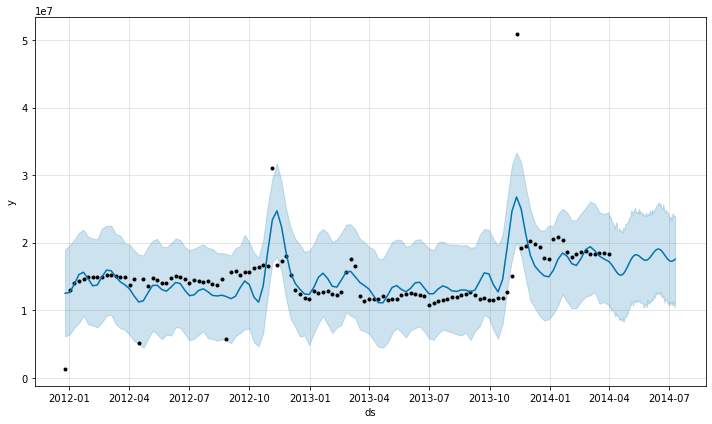

In [139]:
plot1=m.plot(forecast)

In [140]:
# BLUE LINE PREDICTS THE PREDICTION OR THE YHAT VALUE
# THE BLUE SHADED REGION INDICATES UPPER AND LOWER ESTIMATES OF YHAT VALUE

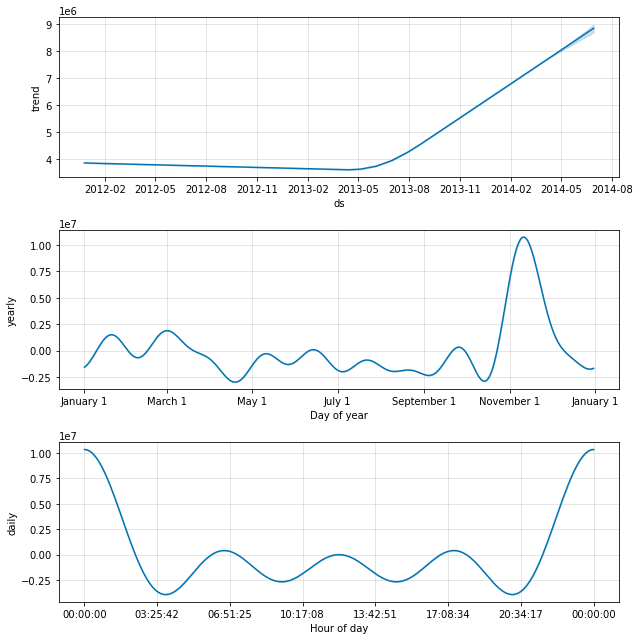

In [144]:
plot2=m.plot_components(forecast)